          Initialization  Silhouette Score
0  k-means++ (Euclidean)          0.479881
1  Random Initialization          0.459378
2   k-means++ (Max Iter)          0.479881
3  k-means++ (Manhattan)          0.479881


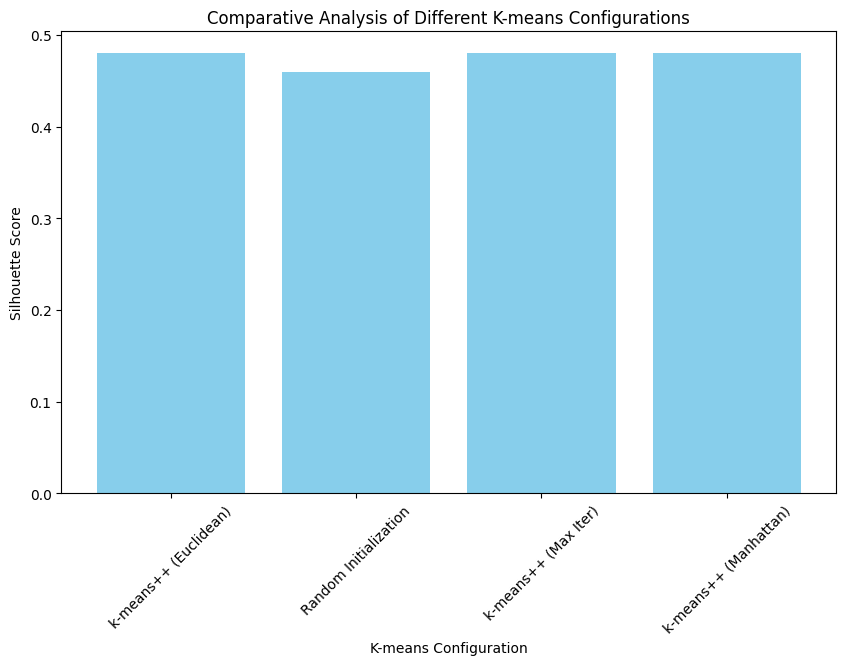

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_euclidean = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_euclidean.fit(X_scaled)

kmeans_random = KMeans(n_clusters=3, init='random', random_state=42)
kmeans_random.fit(X_scaled)

kmeans_max_iter = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=42)
kmeans_max_iter.fit(X_scaled)

kmeans_manhattan = KMeans(n_clusters=3, init='k-means++', algorithm='elkan', random_state=42)
kmeans_manhattan.fit(X_scaled)

silhouette_euclidean = silhouette_score(X_scaled, kmeans_euclidean.labels_)
silhouette_random = silhouette_score(X_scaled, kmeans_random.labels_)
silhouette_max_iter = silhouette_score(X_scaled, kmeans_max_iter.labels_)
silhouette_manhattan = silhouette_score(X_scaled, kmeans_manhattan.labels_)

results = pd.DataFrame({
    'Initialization': ['k-means++ (Euclidean)', 'Random Initialization', 'k-means++ (Max Iter)', 'k-means++ (Manhattan)'],
    'Silhouette Score': [silhouette_euclidean, silhouette_random, silhouette_max_iter, silhouette_manhattan]
})

print(results)

plt.figure(figsize=(10, 6))
plt.bar(results['Initialization'], results['Silhouette Score'], color='skyblue')
plt.title('Comparative Analysis of Different K-means Configurations')
plt.xlabel('K-means Configuration')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.show()